<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


This dataset was gotten from kaggle, the dataset is has various features that can be used to predict health insurance of individuals. Below are the summary of the columns.

Columns:

    1.  age: age of primary beneficiary
    2.  sex: insurance contractor gender, female, male
    3.  bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height
    4.  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    5.  children: Number of children covered by health insurance / Number of dependents
    6.  smoker: Smoking
    7.  region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    8.  charges: Individual medical costs billed by health insurance

# 2. Objectives


The main objective of this analysis is to predict personal health insurance charges of individuals based on their features. other objectives of this analysis include the following;

1. To explore relationships of the various features.
2. To know the key determinant features for insurance charges
3. To know the correlation between insurance charges and other features.

## Data Cleaning and Data Exploration

In [4]:
# checking for the shape of the dataset
print("The shape of the dataset is:", data.shape)

The shape of the dataset is: (1338, 7)


From the output, it can be seen that the dataset has 1338 rows and 7 columns.

In [5]:
# checking for info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the output, it can be seen that there are 1338 non-null values, which implies that the datasets as no missing since the total number of rows we have are 1338. Also, it can be seen that there are 2 integer features, 3 object features and 2 float features in the dataset.

In [6]:
# checking for the statistical summary of the numerical values
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# checking for the summary of the categorical values
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

The dataset has 676 males and 662 females

In [8]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

The dataset has 1064 non-smokers and 274 smokers

In [9]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

The dataset has 364 southeast entries, 325 southwest entries, 325 northwest entries, and 324 northeast entries

In [10]:
# checking for duplicates
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :", duplicate)

Duplicate Rows :      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


From the output, it can be seen that the dataset has one duplicate values which will be dropped in the next cell.|

In [11]:
# dropping duplicate value
data.drop_duplicates(keep=False, inplace=True)

In [12]:
#checking length of the dataset after dropping the duplicate
print(len(data))

1336


In [13]:
#converting categorical values into numerical
data['sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
data['smoker'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
data['region'].replace(to_replace=['southeast','southwest', 'northwest', 'northeast'], value=[0,1,2,3],inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


## Exploratory Data Analysis

In [14]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.237275,0.495509,30.663507,1.096557,0.205090,1.454341,13287.833731
std,14.038678,0.500167,6.102752,1.205650,0.403918,1.130846,12110.702320
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.272500,0.000000,0.000000,0.000000,4746.875675
50%,39.000000,0.000000,30.380000,1.000000,0.000000,1.000000,9388.753650
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16687.364100
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [15]:
# checking for the correlation of the dataset
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.018767,0.109416,0.040600,-0.026157,0.007359,0.297606
sex,0.018767,1.000000,-0.046423,-0.018534,-0.077008,0.013543,-0.058799
bmi,0.109416,-0.046423,1.000000,0.012750,0.003742,-0.262791,0.198461
children,0.040600,-0.018534,0.012750,1.000000,0.006989,0.001862,0.066779
smoker,-0.026157,-0.077008,0.003742,0.006989,1.000000,-0.038521,0.787217
region,0.007359,0.013543,-0.262791,0.001862,-0.038521,1.000000,-0.038813
charges,0.297606,-0.058799,0.198461,0.066779,0.787217,-0.038813,1.000000


From the output, there is no multicollinearity between the independent variables, also smoker is the most correlated with charges while region is the least correlated.

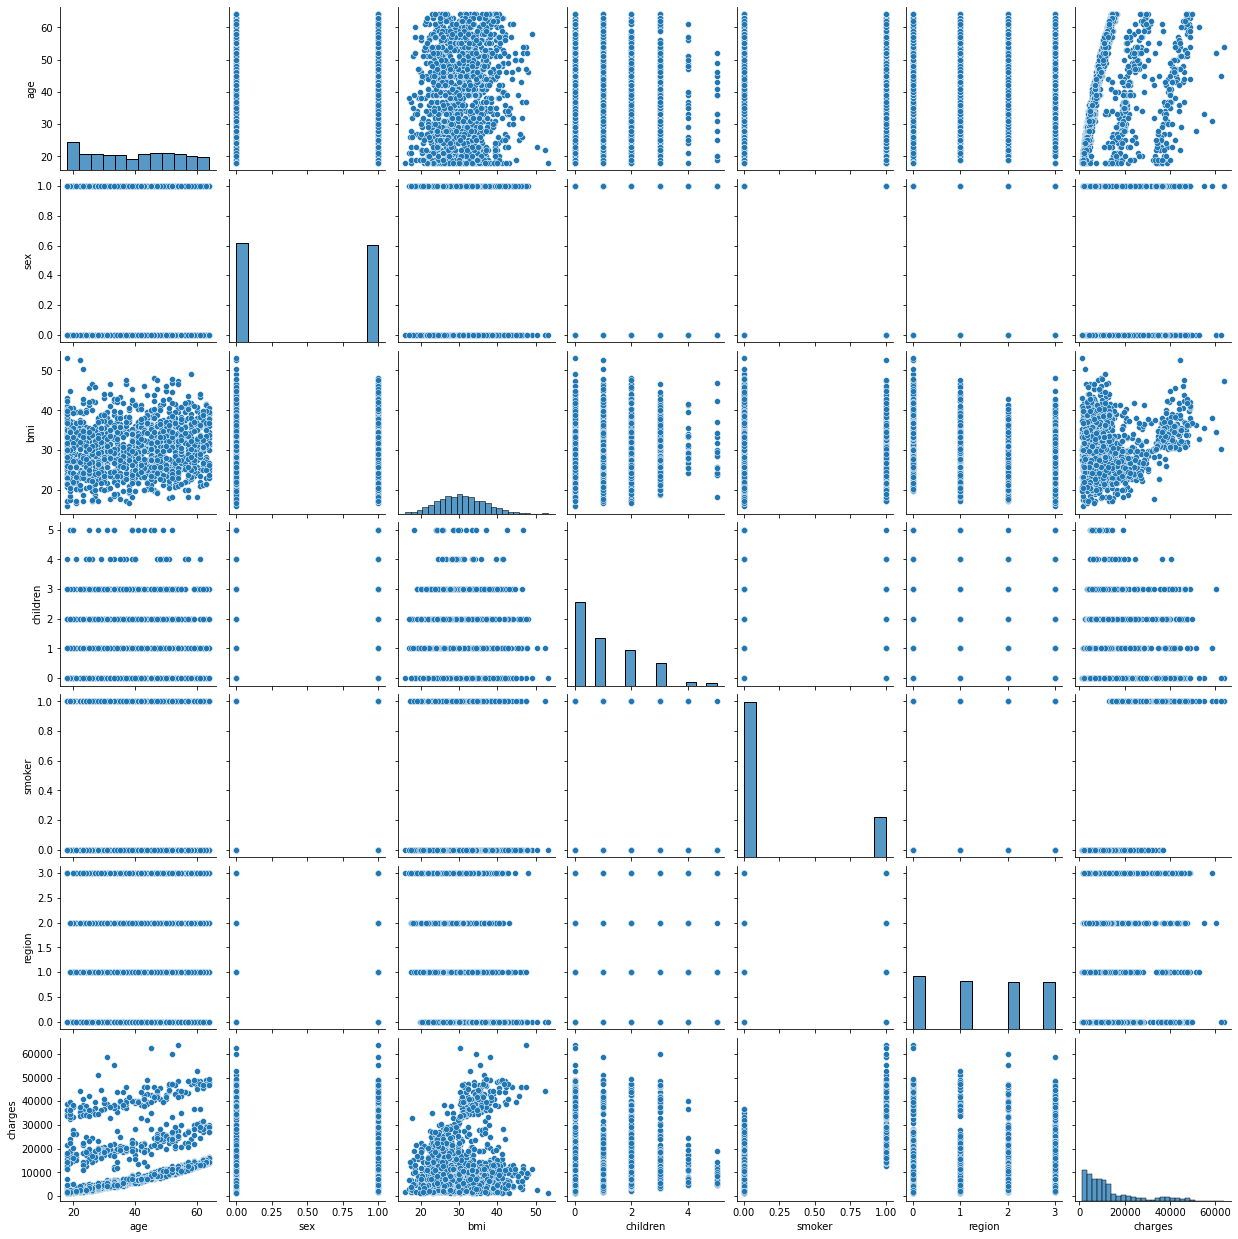

In [16]:
# visualizing the correlation of the dataset
sns.pairplot(data)

<AxesSubplot:xlabel='age', ylabel='charges'>

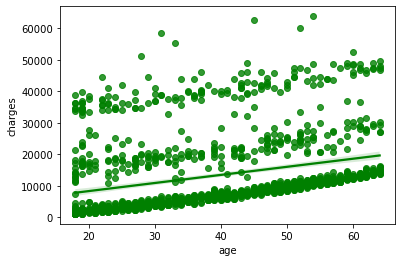

In [17]:
#regplot to check for the correlations between each features and charges
sns.regplot(x= 'age', y= 'charges', data= data, color='g')

From the output, it can be seen that as the age increases, the charges also increases. However the pace is not that high but they are both positively correlated.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

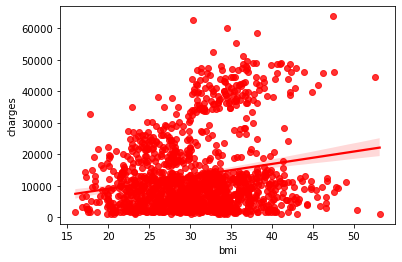

In [18]:
sns.regplot(x= 'bmi', y= 'charges', data= data, color= 'r')

Also, the increase in bmi also increase the charges but not strongly.

<AxesSubplot:xlabel='children', ylabel='charges'>

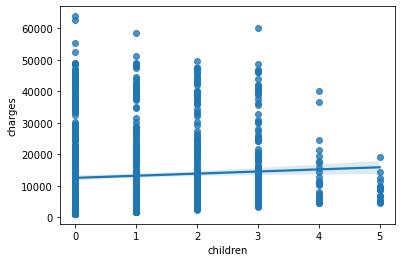

In [19]:
sns.regplot(x= 'children', y= 'charges', data= data)

The charges also increases if the individual has a child, however the correlation between them is not that high.

From the output, it can be seen that the target data is rightly skewed. Log transform will be used to convert it to a normal distribution.

# 3. Linear Regression Models


In [20]:
#spliting dataset into target and features
X = data.drop('charges', axis=1)
y = data['charges']
print("The shape of features are:", X.shape)
print("The shape of target is:", y.shape)

The shape of features are: (1336, 6)
The shape of target is: (1336,)


In [21]:
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.44207691,  1.00902274, -0.45299913, -0.90985593,  1.96873371,
        -0.40192163],
       [-1.51333536, -0.99105794,  0.50922212, -0.08011701, -0.50794071,
        -1.28654649],
       [-0.80075085, -0.99105794,  0.38300229,  1.57936084, -0.50794071,
        -1.28654649],
       [-0.44445859, -0.99105794, -1.30457313, -0.90985593, -0.50794071,
         0.48270324],
       [-0.51571704, -0.99105794, -0.29235572, -0.90985593, -0.50794071,
         0.48270324]])

In [22]:
#using train_test_split function to split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30)
print("Shape of train samples:", X_train.shape[0])
print("Shape of test samples:", X_test.shape[0])

Shape of train samples: 1068
Shape of test samples: 268


### Linear Regression

In [23]:
#creating Linear regression object
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr_pred = lr.predict(X_test)
print("The Rscore of the training set:", lr.score(X_train,y_train))
print("The Rscore of the testing set:", lr.score(X_test,y_test))

The Rscore of the training set: 0.7504954390997491
The Rscore of the testing set: 0.7497435825401021


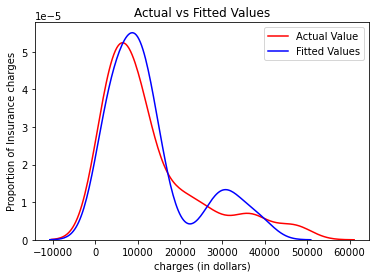

In [26]:
#ploting the distribution of the predicted and actual values
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lr_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('charges (in dollars)')
plt.ylabel('Proportion of Insurance charges')

plt.show()
plt.close()

### Ridge Regression

#### Hyperparameter tuning with GridSearchCV

In [27]:
#Without polynomial features
Input=[('ss',StandardScaler()), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [28]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('model', Ridge(alpha=1))])

In [29]:
#searching for the best parameters with GridSearch 
param_grid = {
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [30]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [31]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.7469252650265407
best_params_:  {'model__alpha': 10}


In [32]:
predict = search.predict(X_test)
predict[0:5] 

array([13942.01296993,  3045.78332977,  7211.81135166, 26507.54655151,
       39238.21820512])

In [33]:
best = search.score(X_test, y_test)
best

0.749875908102692

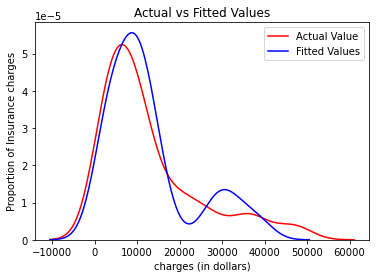

In [34]:
#ploting the distribution of the predicted and actual values
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predict, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('charges (in dollars)')
plt.ylabel('Proportion of Insurance charges')

plt.show()
plt.close()

#### Ridge Regression with Polynomial Features

In [34]:
#With polynomial features
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler()), ('model',Ridge(alpha=1))]
pipe1 = Pipeline(Input)

In [35]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])

In [36]:
#searching for the best parameters with GridSearch
param_grid1 = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [37]:
search1 = GridSearchCV(pipe1, param_grid1, n_jobs=2)
search1.fit(X_train, y_train)
search1

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [38]:
print("best_score_: ",search1.best_score_)
print("best_params_: ",search1.best_params_)

best_score_:  0.8482273561749356
best_params_:  {'model__alpha': 10, 'polynomial__degree': 2}


In [39]:
predict1 = search1.predict(X_test)
predict1[0:5] 

array([13696.84420432,  4758.5149504 , 10149.84317558, 10016.57063535,
       45045.26195365])

In [40]:
best1 = search1.score(X_test, y_test)
best1

0.8041309583521338

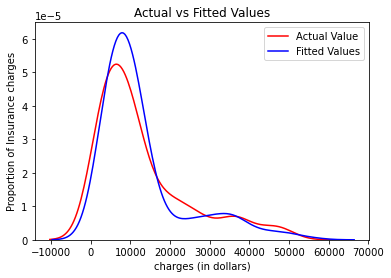

In [41]:
#ploting the distribution of the predicted and actual values
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predict1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('charges (in dollars)')
plt.ylabel('Proportion of Insurance charges')

plt.show()
plt.close()

### Lasso Regression

#### Hyperparameter tuning with GridSearchCV

In [42]:
#Without polynomial features
lasso_input=[('ss',StandardScaler()), ('model',Lasso(alpha=1))]
lasso_pipe = Pipeline(lasso_input)

In [43]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('model', Lasso(alpha=1))])

In [44]:
#searching for the best parameters with GridSearch 
lasso_param_grid = {
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [45]:
la_search = GridSearchCV(pipe, param_grid, n_jobs=2)
la_search.fit(X_train, y_train)
la_search

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [46]:
print("best_score_: ",la_search.best_score_)
print("best_params_: ",la_search.best_params_)

best_score_:  0.7469252650265407
best_params_:  {'model__alpha': 10}


In [47]:
la_pred = search.predict(X_test)
la_pred[0:5] 

array([13942.01296993,  3045.78332977,  7211.81135166, 26507.54655151,
       39238.21820512])

In [48]:
la_best = la_search.score(X_test, y_test)
la_best

0.749875908102692

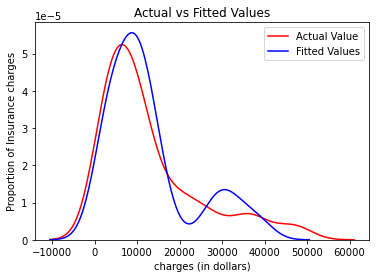

In [49]:
#ploting the distribution of the predicted and actual values
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(la_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('charges (in dollars)')
plt.ylabel('Proportion of Insurance charges')

plt.show()
plt.close()

#### Lasso Regression with Polynomial features

In [50]:
#With polynomial features
la_input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=1)),('ss',StandardScaler()), ('model',Lasso(alpha=1))]
la_pipe = Pipeline(la_input)

In [51]:
la_pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ss', StandardScaler()), ('model', Lasso(alpha=1))])

In [52]:
#searching for the best parameters with GridSearch
param_grid_la = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [53]:
la_search1 = GridSearchCV(la_pipe, param_grid_la, n_jobs=2)
la_search1.fit(X_train, y_train)
la_search1

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [54]:
print("best_score_: ",la_search1.best_score_)
print("best_params_: ",la_search1.best_params_)

best_score_:  0.8485254360851331
best_params_:  {'model__alpha': 10, 'polynomial__degree': 2}


In [55]:
la_pred1 = la_search1.predict(X_test)
la_pred1[0:5] 

array([13703.07755032,  4812.80466232, 10086.09008814,  9988.62651693,
       45183.1382364 ])

In [56]:
la_best1 = la_search1.score(X_test, y_test)
la_best1

0.8039638088769379

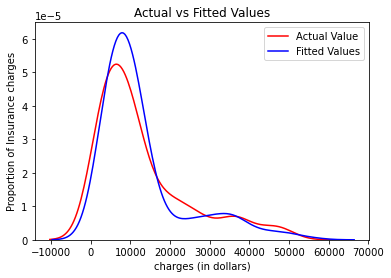

In [57]:
#ploting the distribution of the predicted and actual values
plt.figure()
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predict1, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('charges (in dollars)')
plt.ylabel('Proportion of Insurance charges')

plt.show()
plt.close()

# 4. Insights and key findings


From the three regression models, the following insights can be drawn:
1. The Linear regression has the R_score for the training set is 75% while the testing score is 74% without any polynomial or regularization features added. The visualization of the actual values vs the predicted values shows that the predicted values is slighly more than the actual values and the model is not well fitted.

2. The Ridge regression without polynomial feature training set R_score is 74%, while the testing score is also 74% compare to the linear regression score this is slightly worse. The visualization of the actual values vs the predicted values shows that the model slightly overfit. The Ridge regression with the polynomial feature training set R_score is 84% and the testing set is 80% compare to the linear regression and the ridge regression without polynomial features, the score is better. The visualization of the actual values vs predicted values show that the predicted values fitted the actual values better than the linear regression and ridge regression without polynomial features.

3. The Lasso regression without polynomial feature training set R_score is 74%, while the testing score is also 74% compare to the linear regression score this is slightly worse, however it is same with the Ridge regression without polynomial features. The visualization of the actual values vs the predicted values shows that the model slightly overfit. The Lasso regression with the polynomial feature training set R_score is 84% and the testing set is 80% compare to the linear regression and the ridge regression without polynomial features, the score is better. However, compare to the ridge regression with polynomial features the score is slighly worse. The visualization of the actual values vs predicted values show that the predicted values fitted the actual values better than the linear regression, ridge regression without polynomial features, and lasso regression without polynomial features, but slighly worse compare to the ridge regression with polynomial features


### Key Findings:
1. The dataset do well with polynomial features compare to using only Linear regression and both regularizations alone.
2. In terms of accuracy and explainablity of the model, the Ridge Regression with polynomial features is the best for the main objectives of the analysis

# 5. Next Steps


1. The dataset need more features for it to be a more better model, so there is need to add more relevant features to the dataset in the future.
2. Also, there is need to add more dataset in the future, because the more the data the better the model.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
